# Collect the number of cases with otosclerosis or Meniere's diseas in the 500K and 200K individuals

## Important variables in the otosclerosis definition

[Source of report of H80 (otosclerosis)](https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=131251) - f.131251

[Date H80 first reported (otosclerosis)](https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=131250) - f.131250

[Diagnoses - ICD10](https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=41270) - f.41270 code H.80

[Diagnoses - ICD9](https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=41271) -f.41271 code 387

[Non-cancer illness code, self-reported](https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=20002) f.20002 code 1420

[Age at recruitment](https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=21022) - f.21022

## Important variables in the Meniere's definition

[Source of report of H81 (disorders of vestibular function)](https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=131253)

[Date H81 first reported (disorders of vestibular function)](https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=131252)

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

# Read in the data

## Read in database

In [2]:
# collect the necessary column names of the database for our analysis

with open("/mnt/vast/hpc/csg/UKBiobank/phenotype_files/HI_UKBB/092821_UKBB_486416ind_call90.csv") as fp:
    line = fp.readline() # header
    header = line.split(",")
    
    indiv = ["IID", "FID"]
    icd10_colnames = [col.strip('"') for col in header if "f.41270." in col]
    icd10_ages = [col.strip('"') for col in header if "f.41280." in col]
    icd9_colnames = [col.strip('"') for col in header if "f.41271." in col]
    icd9_ages = [col.strip('"') for col in header if "f.41281." in col]
    f20002_colnames = [col.strip('"') for col in header if "f.20002." in col]
    reported_sex = ["f.31.0.0"]
    genetic_sex = ["f.22001.0.0"]
    ethnicity = [col.strip('"') for col in header if "f.21000." in col]
    source_oto = [col.strip('"') for col in header if "f.131251" in col]
    date_oto = [col.strip('"') for col in header if "f.131250" in col]
    source_vestibular = [col.strip('"') for col in header if "f.131253" in col] 
    date_vestibular = [col.strip('"') for col in header if "f.131252" in col]
    year_of_birth = [col.strip('"') for col in header if "f.34." in col]
    month_of_birth = [col.strip('"') for col in header if "f.52." in col]

In [3]:
# combine the column names into one list
combined_cols = indiv + icd10_colnames + icd10_ages + icd9_colnames + icd9_ages + f20002_colnames + ethnicity + reported_sex + genetic_sex + source_oto + date_oto + source_vestibular + date_vestibular + year_of_birth + month_of_birth

In [4]:
print(datetime.now())

2022-07-06 10:03:41.599755


In [5]:
# database of all individuals that we are working with and the selected phenotypes
df = pd.read_csv("/mnt/vast/hpc/csg/UKBiobank/phenotype_files/HI_UKBB/092821_UKBB_486416ind_call90.csv", quotechar = '"', dtype="string", usecols=combined_cols)
df

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
0,1000019,1000019,Female,1960,November,1111,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1000022,1000022,Male,1954,August,1065,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1000035,1000035,Male,1944,May,1396,1473,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1000046,1000046,Female,1946,March,1065,1294,1476,1473,1374,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1000054,1000054,Female,1942,January,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486411,6025390,6025390,Female,1942,March,1464,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486412,6025409,6025409,Female,1946,November,1478,1473,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486413,6025411,6025411,Female,1960,November,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486414,6025425,6025425,Female,1963,August,1265,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [6]:
print(datetime.now())

2022-07-06 10:11:48.415724


In [7]:
filtered = df.dropna(subset=['f.131251.0.0'])

In [8]:
filtered

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
89,1000947,1000947,Female,1941,August,1065,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2006-12-20,Hospital admissions data only,<NA>,<NA>
510,1005264,1005264,Male,1954,July,1065,1420,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1981-07-01,Self-report only,<NA>,<NA>
548,1005657,1005657,Female,1950,April,1111,1154,1463,1412,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2001-03-08,Primary care only,<NA>,<NA>
1006,1010464,1010464,Female,1952,February,1265,99999,1385,99999,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2003-01-16,Hospital admissions data only,<NA>,<NA>
1322,1013752,1013752,Male,1947,May,1517,1196,1265,1436,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1964-01-01,Primary care only,2014-06-06,Primary care only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483585,5996216,5996216,Male,1944,March,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1998-01-08,Hospital admissions data only,<NA>,<NA>
483665,5997035,5997035,Female,1963,October,1094,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2004-04-22,Hospital admissions data only,<NA>,<NA>
484179,6002333,6002333,Male,1946,April,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1981-04-01,Primary care only,<NA>,<NA>
484853,6009310,6009310,Female,1952,November,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2004-01-22,Hospital admissions data only,<NA>,<NA>


In [9]:
f131251_id = filtered['IID']

## Where do the reports on otosclerosis come from?

In [10]:
print(filtered['f.131251.0.0'].value_counts())

Primary care only                               460
Hospital admissions data only                   279
Self-report only                                161
Primary care and other source(s)                 82
Self-report and other source(s)                  67
Hospital admissions data and other source(s)     15
Name: f.131251.0.0, dtype: Int64


In [11]:
print(filtered['f.131250.0.0'].value_counts()) 

2007-07-01    9
1988-01-01    9
2002-07-01    8
1998-07-01    8
1993-01-01    8
             ..
1998-12-01    1
1990-12-05    1
2012-09-13    1
2005-11-02    1
2004-01-22    1
Name: f.131250.0.0, Length: 814, dtype: Int64


## Find cases in the ICD10 codes

In [12]:
# these are the columns that represent the icd10 columns in the database
icd10_colnames = [col for col in filtered if "f.41270" in col]

In [13]:
# get a dataframe that only contains the icd10 columns from the full database
icd10 = df[icd10_colnames]
icd10

,f.41270.0.0,f.41270.0.1,f.41270.0.2,f.41270.0.3,f.41270.0.4,f.41270.0.5,f.41270.0.6,f.41270.0.7,f.41270.0.8,f.41270.0.9,...,f.41270.0.216,f.41270.0.217,f.41270.0.218,f.41270.0.219,f.41270.0.220,f.41270.0.221,f.41270.0.222,f.41270.0.223,f.41270.0.224,f.41270.0.225
0,E041,H738,M750,M754,M758,N898,N920,N946,R104,Z038,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,F101,J342,R619,S8280,W010,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,H269,K579,K590,K621,M5459,N40,R040,R31,R398,Z466,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,E780,G473,R065,R074,Z824,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,C679,C787,C795,C798,D090,I802,I959,J181,K922,M169,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486411,A099,D649,E279,E538,E559,I10,I839,K449,K573,K649,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486412,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486413,O149,O266,O342,O471,O48,O610,O680,Z370,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486414,G551,M501,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Information on these codes can be found here https://biobank.ndph.ox.ac.uk/showcase/coding.cgi?id=19

```
H80	H80 Otosclerosis	39530	1110	N
H800	H80.0 Otosclerosis involving oval window, nonobliterative	39540	39530	Y
H801	H80.1 Otosclerosis involving oval window, obliterative	39550	39530	Y
H802	H80.2 Cochlear otosclerosis	39560	39530	Y
H808	H80.8 Other otosclerosis	39570	39530	Y
H809	H80.9 Otosclerosis, unspecified	39580	39530	Y
```

In [14]:
# Individuals to be included in the otosclerosis count
incl_oto = [ 'H80', 'H800', 'H801', "H802", "H808", "H809"]

In [15]:
# returns if the current individual should be included based on the inclusion list
def contains_code(row, incl_oto):
    for i in row:
        if not pd.isna(i) and i in incl_oto:
            return True
            
    return False

In [16]:
#collect the individuals that should be included because of icd10
incl_fxn_icd10 = lambda row: contains_code(row, incl_oto)

In [17]:
incl_10 = icd10.apply(incl_fxn_icd10, axis=1)

In [18]:
incl_10

0         False
1         False
2         False
3         False
4         False
          ...  
486411    False
486412    False
486413    False
486414    False
486415    False
Length: 486416, dtype: bool

In [19]:
icd10_filtered = df[incl_10]

In [20]:
icd10_filtered

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
89,1000947,1000947,Female,1941,August,1065,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2006-12-20,Hospital admissions data only,<NA>,<NA>
1006,1010464,1010464,Female,1952,February,1265,99999,1385,99999,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2003-01-16,Hospital admissions data only,<NA>,<NA>
1811,1018816,1018816,Female,1954,May,1111,1367,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1998-08-17,Hospital admissions data only,<NA>,<NA>
3399,1035210,1035210,Female,1959,March,1111,1226,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2007-02-05,Hospital admissions data only,<NA>,<NA>
4345,1045073,1045073,Male,1950,March,1065,1419,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2012-09-05,Hospital admissions data only,2012-09-07,Hospital admissions data only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480671,5966131,5966131,Male,1954,April,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1998-08-10,Hospital admissions data only,<NA>,<NA>
480713,5966577,5966577,Male,1956,October,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2007-07-04,Hospital admissions data only,<NA>,<NA>
483585,5996216,5996216,Male,1944,March,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1998-01-08,Hospital admissions data only,<NA>,<NA>
483665,5997035,5997035,Female,1963,October,1094,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2004-04-22,Hospital admissions data only,<NA>,<NA>


In [21]:
icd10_id = icd10_filtered['IID']

In [22]:
print(icd10_filtered['f.131251.0.0'].value_counts())

Hospital admissions data only                   279
Primary care and other source(s)                 74
Self-report and other source(s)                  55
Hospital admissions data and other source(s)     15
Primary care only                                 1
Name: f.131251.0.0, dtype: Int64


In [23]:
# Two ICD10 cases for otosclerosis are NA for f.131251
icd10_filtered[icd10_filtered['f.131251.0.0'].isna()]

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
105402,2089419,2089419,Male,1945,January,1065,1473,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
267552,3764605,3764605,Male,1944,December,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


## Find cases ICD9

In [24]:
# these are the columns that represent the icd9 columns in the working database
icd9_colnames = [col for col in filtered if "f.41271" in col]

In [25]:
# get a dataframe that only contains the icd9 columns from the working database
icd9 = df[icd9_colnames]
icd9

,f.41271.0.0,f.41271.0.1,f.41271.0.2,f.41271.0.3,f.41271.0.4,f.41271.0.5,f.41271.0.6,f.41271.0.7,f.41271.0.8,f.41271.0.9,...,f.41271.0.37,f.41271.0.38,f.41271.0.39,f.41271.0.40,f.41271.0.41,f.41271.0.42,f.41271.0.43,f.41271.0.44,f.41271.0.45,f.41271.0.46
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,3000,5198,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486411,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486412,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486413,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486414,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Information taken from resource https://biobank.ndph.ox.ac.uk/showcase/coding.cgi?id=87

```
387	387 Otosclerosis	3318	66	N
3870	3870 Otosclerosis involving oval window, nonobliterative	3319	3318	Y
3871	3871 Otosclerosis involving oval window, obliterative	3320	3318	Y
3872	3872 Cochlear otosclerosis	3321	3318	Y
3878	3878 Other specified otosclerosis	3322	3318	Y
3879	3879 Otosclerosis, unspecified	3323	3318	Y
```

In [26]:
# Individuals to be included in the otosclerosis count
incl_oto_9 = ['387','3870', '3871', '3872', '3878', '3879']

In [27]:
# returns if the current individual should be included based on the inclusion list
def contains_code(row, incl_oto_9):
    for i in row:
        if not pd.isna(i) and i in incl_oto_9:
            return True
            
    return False

In [28]:
#collect the individuals that should be included because of icd10
incl_fxn_icd9 = lambda row: contains_code(row, incl_oto_9)

In [29]:
incl_9 = icd9.apply(incl_fxn_icd9, axis=1)

In [30]:
icd9_filtered = df[incl_9]

In [31]:
icd9_filtered

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
50178,1518964,1518964,Female,1952,May,1065,1138,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
66312,1685646,1685646,Male,1938,December,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1992-02-11,Primary care only,1980-02-01,Primary care only
74122,1766142,1766142,Female,1952,January,1077,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
81795,1845280,1845280,Male,1951,April,1111,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
86794,1897067,1897067,Female,1952,March,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
97548,2008079,2008079,Female,1943,November,1074,1065,1111,1474,1473,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
97808,2010744,2010744,Female,1946,April,1464,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1982-07-02,Primary care only,<NA>,<NA>
103798,2072693,2072693,Female,1947,December,1135,1415,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
128298,2325910,2325910,Female,1948,January,1458,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1983-06-01,Primary care only,<NA>,<NA>
153650,2587613,2587613,Male,1963,March,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1997-04-17,Hospital admissions data only,<NA>,<NA>


In [32]:
icd9_id = icd9_filtered['IID']

In [33]:
print(icd9_filtered['f.131251.0.0'].value_counts())

Primary care only                   9
Self-report only                    3
Hospital admissions data only       2
Self-report and other source(s)     2
Primary care and other source(s)    1
Name: f.131251.0.0, dtype: Int64


In [34]:
# 26 ICD9 cases for otosclerosis are NA for f.131251
icd9_filtered[icd9_filtered['f.131251.0.0'].isna()]

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
50178,1518964,1518964,Female,1952,May,1065,1138,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
74122,1766142,1766142,Female,1952,January,1077,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
81795,1845280,1845280,Male,1951,April,1111,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
86794,1897067,1897067,Female,1952,March,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
97548,2008079,2008079,Female,1943,November,1074,1065,1111,1474,1473,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
103798,2072693,2072693,Female,1947,December,1135,1415,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
158858,2641222,2641222,Female,1939,May,1065,99999,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
179107,2850448,2850448,Male,1941,July,1111,1473,1440,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
197270,3038081,3038081,Female,1950,July,1074,1111,1465,1466,1415,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
201043,3077095,3077095,Male,1944,May,1072,1473,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [35]:
icd9_filtered[icd9_filtered["IID"].isin(f131251_id)]

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
66312,1685646,1685646,Male,1938,December,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1992-02-11,Primary care only,1980-02-01,Primary care only
97808,2010744,2010744,Female,1946,April,1464,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1982-07-02,Primary care only,<NA>,<NA>
128298,2325910,2325910,Female,1948,January,1458,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1983-06-01,Primary care only,<NA>,<NA>
153650,2587613,2587613,Male,1963,March,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1997-04-17,Hospital admissions data only,<NA>,<NA>
205882,3127034,3127034,Female,1943,July,1111,1440,1440,1465,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1989-01-01,Primary care only,<NA>,<NA>
208829,3157389,3157389,Female,1953,April,1465,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1984-08-06,Primary care only,<NA>,<NA>
243072,3511583,3511583,Female,1939,January,1111,1264,99999,99999,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1992-08-21,Primary care only,<NA>,<NA>
243529,3516320,3516320,Male,1942,December,1081,1065,1396,1465,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1986-09-18,Primary care only,<NA>,<NA>
276671,3858626,3858626,Female,1950,March,1420,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1979-07-01,Self-report only,<NA>,<NA>
297197,4070664,4070664,Female,1956,March,1420,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1991-09-01,Self-report only,<NA>,<NA>


## Find cases self-report

In [36]:
# these are the columns that represent the self-report columns in the working database
f20002_colnames = set([col for col in filtered if "f.20002" in col])

In [37]:
# get a dataframe that only contains the self-report columns from the working database
f20002 = df[f20002_colnames]
f20002

/tmp/2592277.1.high_mem.q/ipykernel_11860/773151605.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f20002 = df[f20002_colnames]


,f.20002.3.28,f.20002.1.24,f.20002.0.15,f.20002.1.6,f.20002.1.7,f.20002.1.26,f.20002.1.9,f.20002.2.4,f.20002.3.15,f.20002.3.0,...,f.20002.2.31,f.20002.1.15,f.20002.2.21,f.20002.3.6,f.20002.0.5,f.20002.0.13,f.20002.3.3,f.20002.3.13,f.20002.2.25,f.20002.0.10
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1573,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486411,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486412,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1287,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486413,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486414,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Information about these codes can be found here https://biobank.ndph.ox.ac.uk/showcase/coding.cgi?id=6

```
1420	otosclerosis	1474	1469	Y
```

In [38]:
# Individuals to be included in the otosclerosis count
incl_oto_self = ['1420']

In [39]:
# returns if the current individual should be included based on the inclusion list
def contains_code(row, incl_oto_self):
    for i in row:
        if not pd.isna(i) and i in incl_oto_self:
            return True
            
    return False

In [40]:
# collect the individuals that should be included because of self-report
incl_fxn_f20002 = lambda row: contains_code(row, incl_oto_self)
incl_f20002 = f20002.apply(incl_fxn_f20002, axis=1)

In [41]:
f20002_filtered = df[incl_f20002]

In [42]:
f20002_filtered

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
213,1002216,1002216,Male,1945,June,1223,1420,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
510,1005264,1005264,Male,1954,July,1065,1420,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1981-07-01,Self-report only,<NA>,<NA>
2421,1025150,1025150,Female,1942,December,1420,1417,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1988-07-01,Self-report and other source(s),<NA>,<NA>
8287,1085876,1085876,Female,1953,March,1420,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1973-09-01,Self-report only,<NA>,<NA>
10518,1109006,1109006,Female,1951,July,1277,1420,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1987-03-25,Primary care and other source(s),<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472973,5886610,5886610,Male,1947,January,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2002-03-01,Primary care and other source(s),<NA>,<NA>
476631,5924460,5924460,Female,1964,April,1065,1420,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1978-10-01,Self-report and other source(s),<NA>,<NA>
476839,5926575,5926575,Female,1967,March,1420,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1999-07-01,Self-report only,<NA>,<NA>
478217,5940765,5940765,Female,1957,January,1065,1111,1420,1387,1452,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2007-07-01,Self-report and other source(s),<NA>,<NA>


In [43]:
print(f20002_filtered['f.131251.0.0'].value_counts())

Self-report only                                161
Self-report and other source(s)                  67
Primary care and other source(s)                 13
Hospital admissions data and other source(s)      2
Name: f.131251.0.0, dtype: Int64


In [44]:
# 26 ICD9 cases for otosclerosis are NA for f.131251
f20002_filtered[f20002_filtered['f.131251.0.0'].isna()]

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
213,1002216,1002216,Male,1945,June,1223,1420,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
149827,2548256,2548256,Male,1955,December,1420,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
223193,3305874,3305874,Female,1961,February,99999,99999,1421,1265,1286,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2005-12-09,Primary care and other source(s)


In [45]:
f20002_id = f20002_filtered['IID']

## Find unique IID's in source oto, icd10, icd9 and self-report databases

In [46]:
df_union= pd.concat([f131251_id, icd10_id, icd9_id, f20002_id]).drop_duplicates()

In [47]:
df_union

89        1000947
510       1005264
548       1005657
1006      1010464
1322      1013752
           ...   
480772    5967193
483939    5999872
213       1002216
149827    2548256
223193    3305874
Name: IID, Length: 1095, dtype: string

# Find Meniere's disease cases

### Find cases with Meniere in ICD10 codes

```
H81	H81 Disorders of vestibular function	39590	1110	N
H810	H81.0 Meniere's disease	39600	39590	Y
H811	H81.1 Benign paroxysmal vertigo	39610	39590	Y
H812	H81.2 Vestibular neuronitis	39620	39590	Y
H813	H81.3 Other peripheral vertigo	39630	39590	Y
H814	H81.4 Vertigo of central origin	39640	39590	Y
H818	H81.8 Other disorders of vestibular function	39650	39590	Y
H819	H81.9 Disorder of vestibular function, unspecified	39660	39590	Y
```

In [48]:
# these are the columns that represent the icd10 columns in the database
icd10_colnames = [col for col in filtered if "f.41270" in col]

In [49]:
# get a dataframe that only contains the icd10 columns from the full database
icd10 = df[icd10_colnames]
icd10

,f.41270.0.0,f.41270.0.1,f.41270.0.2,f.41270.0.3,f.41270.0.4,f.41270.0.5,f.41270.0.6,f.41270.0.7,f.41270.0.8,f.41270.0.9,...,f.41270.0.216,f.41270.0.217,f.41270.0.218,f.41270.0.219,f.41270.0.220,f.41270.0.221,f.41270.0.222,f.41270.0.223,f.41270.0.224,f.41270.0.225
0,E041,H738,M750,M754,M758,N898,N920,N946,R104,Z038,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,F101,J342,R619,S8280,W010,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,H269,K579,K590,K621,M5459,N40,R040,R31,R398,Z466,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,E780,G473,R065,R074,Z824,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,C679,C787,C795,C798,D090,I802,I959,J181,K922,M169,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486411,A099,D649,E279,E538,E559,I10,I839,K449,K573,K649,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486412,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486413,O149,O266,O342,O471,O48,O610,O680,Z370,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486414,G551,M501,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [50]:
# Individuals to be included in the otosclerosis count
incl_meniere = [ 'H810']

In [51]:
# returns if the current individual should be included based on the inclusion list
def contains_code(row, incl_meniere):
    for i in row:
        if not pd.isna(i) and i in incl_meniere:
            return True
            
    return False

In [52]:
#collect the individuals that should be included because of icd10
incl_fxn_icd10 = lambda row: contains_code(row, incl_meniere)

In [53]:
incl_10_meniere = icd10.apply(incl_fxn_icd10, axis=1)

In [54]:
incl_10_meniere

0         False
1         False
2         False
3         False
4         False
          ...  
486411    False
486412    False
486413    False
486414    False
486415    False
Length: 486416, dtype: bool

In [55]:
icd10_meniere = df[incl_10_meniere]

In [56]:
icd10_meniere

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
331,1003440,1003440,Female,1945,February,1309,1294,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2005-04-27,Primary care and other source(s)
452,1004673,1004673,Female,1941,April,1465,1197,1312,1138,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2009-02-02,Primary care and other source(s)
1470,1015307,1015307,Female,1947,September,1421,1080,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1987-07-01,Self-report and other source(s)
1992,1020665,1020665,Male,1951,August,1534,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2597,1026994,1026994,Female,1944,February,1065,1465,1257,1138,1415,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2006-11-01,Primary care and other source(s)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484424,6004899,6004899,Female,1941,December,1465,1474,1473,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2013-01-17,Primary care and other source(s)
485916,6020276,6020276,Female,1952,July,1065,1111,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2019-10-25,Hospital admissions data only
485955,6020690,6020690,Female,1949,March,1065,1162,1421,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2005-07-01,Self-report and other source(s)
486074,6021916,6021916,Female,1944,May,1065,1093,1220,1126,1294,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2017-02-06,Hospital admissions data only


In [57]:
icd10_meniere_id = icd10_meniere['IID']

In [58]:
print(icd10_meniere['f.131253.0.0'].value_counts())

Hospital admissions data only                   516
Self-report and other source(s)                 423
Primary care and other source(s)                185
Hospital admissions data and other source(s)     29
Self-report only                                  7
Primary care only                                 7
Name: f.131253.0.0, dtype: Int64


In [59]:
# There are 8 individuals with NA for f.131253 that have meniere's icd10 code
meniere_na= icd10_meniere[icd10_meniere['f.131253.0.0'].isna()]

In [60]:
meniere_na[icd10_colnames ]

,f.41270.0.0,f.41270.0.1,f.41270.0.2,f.41270.0.3,f.41270.0.4,f.41270.0.5,f.41270.0.6,f.41270.0.7,f.41270.0.8,f.41270.0.9,...,f.41270.0.216,f.41270.0.217,f.41270.0.218,f.41270.0.219,f.41270.0.220,f.41270.0.221,f.41270.0.222,f.41270.0.223,f.41270.0.224,f.41270.0.225
1992,C443,D120,D127,H810,I849,K529,K573,K621,K635,N201,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
103785,B972,F412,H810,I10,J128,U071,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
123986,B980,D508,D510,D519,E210,E538,E669,E780,E785,E789,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
212529,B370,B962,B968,C61,D122,D123,D124,D125,D509,D519,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
278693,A415,B962,C64,E039,E669,E871,F329,G401,G409,G439,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
381712,C64,D410,D649,E780,H810,I10,I251,I259,J459,K590,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
393063,A099,B349,B379,E119,E669,E780,F329,F419,G473,H810,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
436573,D124,F329,G409,H810,H919,I10,K210,K573,K625,K635,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


### Find cases with Meniere in ICD9 codes

In [61]:
# these are the columns that represent the icd9 columns in the working database
icd9_colnames = [col for col in filtered if "f.41271" in col]

In [62]:
# get a dataframe that only contains the icd9 columns from the working database
icd9 = df[icd9_colnames]
icd9

,f.41271.0.0,f.41271.0.1,f.41271.0.2,f.41271.0.3,f.41271.0.4,f.41271.0.5,f.41271.0.6,f.41271.0.7,f.41271.0.8,f.41271.0.9,...,f.41271.0.37,f.41271.0.38,f.41271.0.39,f.41271.0.40,f.41271.0.41,f.41271.0.42,f.41271.0.43,f.41271.0.44,f.41271.0.45,f.41271.0.46
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,3000,5198,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486411,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486412,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486413,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486414,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


The information was taken from icd9 coding

```
386	386 Vertiginous syndromes and other disorders of vestibular system	3309	66	N
3860	3860 Meniere's disease	3310	3309	Y
3861	3861 Other and unspecified peripheral vertigo	3311	3309	Y
3862	3862 Vertigo of central origin	3312	3309	Y
3863	3863 Labyrinthitis	3313	3309	Y
3864	3864 Labyrinthine fistula	3314	3309	Y
3865	3865 Labyrinthine dysfunction	3315	3309	Y
3868	3868 Other disorders of labyrinth	3316	3309	Y
3869	3869 Unspecified vertiginous syndromes and labyrinthine disorders	3317	3309	Y
```

In [63]:
# Individuals to be included in the otosclerosis count
incl_icd9_meniere = ['3860']

In [64]:
# returns if the current individual should be excluded based on the exclusion list
def contains_code(row, incl_icd9_meniere):
    for i in row:
        if not pd.isna(i) and i in incl_icd9_meniere:
            return True
            
    return False

In [65]:
#collect the individuals that should be excluded because of icd10
incl_fxn_icd9 = lambda row: contains_code(row, incl_icd9_meniere)

In [66]:
incl_9_meniere = icd9.apply(incl_fxn_icd9, axis=1)

In [67]:
icd9_meniere = df[incl_9_meniere]

In [68]:
icd9_meniere

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
36276,1375204,1375204,Male,1958,November,1473,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1989-04-30,Primary care only
170466,2761203,2761203,Female,1941,August,1065,1226,1421,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1980-07-01,Self-report and other source(s)
181345,2873516,2873516,Female,1948,August,1075,1074,1464,1421,1226,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1988-02-01,Self-report and other source(s)
181530,2875409,2875409,Male,1944,July,1065,1421,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1989-02-25,Primary care and other source(s)
233611,3413774,3413774,Female,1946,April,1065,1094,1226,1465,1452,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1991-06-01,Primary care only
341860,4532589,4532589,Female,1941,April,1465,1072,1278,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1988-01-12,Primary care only
426870,5410383,5410383,Female,1947,October,1482,1287,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
427301,5414813,5414813,Female,1939,June,1075,1421,1154,1465,1295,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1996-01-01,Self-report and other source(s)
438149,5526977,5526977,Female,1943,October,1225,1459,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1976-04-01,Self-report and other source(s)
450387,5653637,5653637,Female,1948,October,1473,1286,1421,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1962-04-01,Self-report and other source(s)


In [69]:
print(icd9_meniere['f.131253.0.0'].value_counts())

Self-report and other source(s)     7
Primary care only                   3
Primary care and other source(s)    1
Name: f.131253.0.0, dtype: Int64


In [70]:
icd9_meniere[icd9_meniere['f.131253.0.0'].isna()]

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
426870,5410383,5410383,Female,1947,October,1482,1287,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [71]:
icd9_meniere_id = icd9_meniere['IID']

### Find cases with Meniere in self-report

In [72]:
# these are the columns that represent the self-report columns in the working database
f20002_colnames = set([col for col in filtered if "f.20002" in col])

In [73]:
# get a dataframe that only contains the self-report columns from the working database
f20002 = df[f20002_colnames]
f20002

/tmp/2579008.1.high_mem.q/ipykernel_2502/773151605.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f20002 = df[f20002_colnames]


,f.20002.2.0,f.20002.0.28,f.20002.1.25,f.20002.0.25,f.20002.0.10,f.20002.0.8,f.20002.1.19,f.20002.1.33,f.20002.0.1,f.20002.3.10,...,f.20002.2.2,f.20002.2.20,f.20002.0.5,f.20002.2.28,f.20002.2.29,f.20002.1.18,f.20002.2.23,f.20002.1.32,f.20002.2.21,f.20002.3.28
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1473,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1065,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1294,<NA>,...,1473,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486411,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486412,1138,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1473,<NA>,...,1065,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486413,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486414,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Information about these codes can be found here https://biobank.ndph.ox.ac.uk/showcase/coding.cgi?id=6

```
1421	meniere's disease
```

In [74]:
# Individuals to be included in the otosclerosis count
incl_meniere_self = ['1421']

In [75]:
# returns if the current individual should be included based on the inclusion list
def contains_code(row, incl_meniere_self):
    for i in row:
        if not pd.isna(i) and i in incl_meniere_self:
            return True
            
    return False

In [76]:
# collect the individuals that should be included because of self-report
incl_fxn_f20002 = lambda row: contains_code(row, incl_meniere_self)
incl_f20002 = f20002.apply(incl_fxn_f20002, axis=1)

In [77]:
f20002_meniere = df[incl_f20002]

In [78]:
f20002_meniere

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
619,1006389,1006389,Male,1940,November,1065,1421,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2007-07-01,Self-report only
1470,1015307,1015307,Female,1947,September,1421,1080,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1987-07-01,Self-report and other source(s)
1835,1019052,1019052,Female,1951,September,1111,1265,1261,1226,1421,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1988-07-01,Self-report only
2104,1021814,1021814,Female,1941,January,1082,1072,1473,1465,1421,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2006-07-01,Self-report only
2491,1025878,1025878,Female,1951,September,1421,1374,1138,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2001-07-01,Self-report only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483627,5996643,5996643,Female,1939,August,1065,1465,1458,1286,1421,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1983-07-01,Self-report only
483671,5997090,5997090,Male,1947,February,1421,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1984-08-01,Self-report and other source(s)
485127,6012123,6012123,Female,1958,September,1421,1286,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2005-07-01,Self-report and other source(s)
485955,6020690,6020690,Female,1949,March,1065,1162,1421,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2005-07-01,Self-report and other source(s)


In [79]:
print(f20002_meniere['f.131253.0.0'].value_counts())

Self-report only                                670
Self-report and other source(s)                 592
Primary care and other source(s)                146
Hospital admissions data and other source(s)     17
Primary care only                                 4
Hospital admissions data only                     3
Name: f.131253.0.0, dtype: Int64


In [80]:
f20002_meniere[f20002_meniere['f.131253.0.0'].isna()]

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
103797,2072689,2072689,Female,1949,January,99999,99999,99999,99999,1242,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
122440,2265470,2265470,Female,1940,March,1286,1421,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
190092,2963984,2963984,Male,1944,January,1065,1473,1421,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
268969,3779273,3779273,Male,1949,May,1421,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
429804,5440686,5440686,Male,1949,April,1094,1593,1421,1474,1597,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
432615,5469730,5469730,Male,1940,October,1111,1278,1421,1465,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [81]:
f20002_meniere_id = f20002_meniere['IID']

### Find unique IID's for cases with meniere's in icd10, icd9 and self-report

In [82]:
df_meniere = pd.concat([icd10_meniere_id, icd9_meniere_id, f20002_meniere_id]).drop_duplicates()

In [83]:
df_meniere

331       1003440
452       1004673
1470      1015307
1992      1020665
2597      1026994
           ...   
483417    5994513
483613    5996503
483627    5996643
485127    6012123
486020    6021359
Name: IID, Length: 2116, dtype: string

### Find the cases that have information for f.131251 disorders of vestibular function

In [85]:
meniere_filtered = df.dropna(subset=['f.131253.0.0'])

In [86]:
meniere_filtered

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
59,1000642,1000642,Female,1958,November,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2015-06-23,Primary care only
87,1000920,1000920,Female,1951,January,1113,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2008-03-25,Primary care only
93,1000992,1000992,Male,1960,May,1111,1474,1312,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2013-10-23,Primary care only
96,1001028,1001028,Female,1942,December,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2010-09-13,Primary care only
160,1001687,1001687,Female,1943,February,1065,1220,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2001-06-18,Primary care only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486074,6021916,6021916,Female,1944,May,1065,1093,1220,1126,1294,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2017-02-06,Hospital admissions data only
486085,6022039,6022039,Female,1952,November,1074,1065,1506,1373,1286,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2013-09-23,Primary care only
486087,6022050,6022050,Female,1956,March,1416,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2013-02-13,Primary care only
486189,6023090,6023090,Male,1949,April,1074,1065,1111,1473,1138,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2011-06-02,Primary care only


In [87]:
df_meniere[df_meniere.isin(meniere_filtered['IID'])]

331       1003440
452       1004673
1470      1015307
2597      1026994
2746      1028530
           ...   
483417    5994513
483613    5996503
483627    5996643
485127    6012123
486020    6021359
Name: IID, Length: 2101, dtype: string

# Apply exclusion criteria, genotype QC and remove PCA outliers for white European

## Read in exclusion criteria for icd10, icd9, and self-report for otosclerosis

In [48]:
# csv file that contains information on the exclusion criteria for cases and controls
exclusion = pd.read_csv("/mnt/vast/hpc/csg/UKBiobank/phenotype_files/HI_UKBB/otosclerosis/062922_ICD10_9_selfreport_inclusion_exclusion_otosclerosis_IS.csv")
exclusion

,UKBB_field_code,Phenotype,cases_UKB_showcase,Excluded_fulldb_lateonsetHI,Excluded_from_controls,Otosclerosis,Meniere's,Cases_f3393,Cases_f2247,Cases_f2257,Cases_f4803,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,f.41270,H60-H62 Diseases of external ear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f.41270,H60 Otitis externa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f.41270,H60.0 Abscess of external ear,32,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f.41270,H60.1 Cellulitis of external ear,218,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f.41270,H60.2 Malignant otitis externa,49,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Read in individuals in genotype array QC

In [49]:
qc_individuals = pd.read_csv("/mnt/vast/hpc/csg/UKBiobank/results/092821_PCA_results_500K/white_europeans/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.white_europeans.filtered.fam", sep="\t", header=None)
qc_individuals

,0,1,2,3,4,5
0,1000019,1000019,0,0,2,-9
1,1000022,1000022,0,0,1,-9
2,1000035,1000035,0,0,1,-9
3,1000046,1000046,0,0,2,-9
4,1000054,1000054,0,0,2,-9
...,...,...,...,...,...,...
460644,6025390,6025390,0,0,2,-9
460645,6025409,6025409,0,0,2,-9
460646,6025411,6025411,0,0,2,-9
460647,6025425,6025425,0,0,2,-9


## Read in PCA outlier file

In [50]:
# outlier individuals that will need to be removed
outlier = pd.read_csv("/mnt/vast/hpc/csg/UKBiobank/results/092821_PCA_results_500K/092821_PCA_related_pval0.005/ukb47922_white_460649ind.092821_PCA_related_pval0.005.pca.projected.outliers", sep="\t", header=None)
outlier

,0,1
0,1003423,1003423
1,1008606,1008606
2,1009852,1009852
3,1010412,1010412
4,1010678,1010678
...,...,...
1377,5801962,5801962
1378,5807807,5807807
1379,5809112,5809112
1380,5833189,5833189


## Define individuals with exome data

In [51]:
individs_200k = pd.read_csv("/mnt/vast/hpc/csg/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c1.merged.filtered.fam", header=None, sep=" ")

## Remove individuals that do not match for reported and genetic sex

In [52]:
reported_sex = ["f.31.0.0"]
genetic_sex = ["f.22001.0.0"]

In [53]:
# returns true only if 
def inconsistent_sexes(row):
    return pd.isna(row[genetic_sex[0]]) or row[reported_sex[0]] != row[genetic_sex[0]]

In [54]:
# exclusion based on inconsistent sex
ex_sex = df[reported_sex + genetic_sex].apply(inconsistent_sexes, axis=1)

In [55]:
df_filtered = df[~ex_sex]

In [56]:
print(sum(ex_sex), "of 500k individuals removed because of inconsistency with the genetic and reported sex variables")

0 of 500k individuals removed because of inconsistency with the genetic and reported sex variables


In [57]:
df_filtered

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
0,1000019,1000019,Female,1960,November,1111,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1000022,1000022,Male,1954,August,1065,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1000035,1000035,Male,1944,May,1396,1473,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1000046,1000046,Female,1946,March,1065,1294,1476,1473,1374,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1000054,1000054,Female,1942,January,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486411,6025390,6025390,Female,1942,March,1464,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486412,6025409,6025409,Female,1946,November,1478,1473,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486413,6025411,6025411,Female,1960,November,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486414,6025425,6025425,Female,1963,August,1265,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


## Remove non-white individuals

In [58]:
# set of answers for the ethnicity question
set(df_filtered[ethnicity[0]].to_list()).union( set(df_filtered[ethnicity[1]].to_list()) , set(df_filtered[ethnicity[2]].to_list()))

{<NA>,
 'African',
 'Any other Asian background',
 'Any other Black background',
 'Any other mixed background',
 'Any other white background',
 'Asian or Asian British',
 'Bangladeshi',
 'Black or Black British',
 'British',
 'Caribbean',
 'Chinese',
 'Do not know',
 'Indian',
 'Irish',
 'Mixed',
 'Other ethnic group',
 'Pakistani',
 'Prefer not to answer',
 'White',
 'White and Asian',
 'White and Black African',
 'White and Black Caribbean'}

In [59]:
# these should align with all possible options for ethnicity answers except for <NA>, Do not know, and Prefer not to answer
white = ['British', 'Irish', 'White','Any other white background']
african = ['Caribbean','White and Black Caribbean', 'African', 'White and Black African', 'Black or Black British', 'Any other Black background' ]
asian = ['Indian', 'Pakistani', 'White and Asian', 'Any other Asian background', 'Bangladeshi', 'Asian or Asian British']
mixed = ['Mixed', 'Any other mixed background']
chinese = ['Chinese']
other = ['Other ethnic group']

# figure out the ancestry of each individual
def ancestry(row):
    temp = [x for x in row[ethnicity] if not pd.isna(x) and x != "Prefer not to answer" and x != "Do not know"]
    if len(temp) == 0:
        return "Unknown"
    
    if len(set(temp)) == 1 and temp[0] in white: # if we have only one unique answer and the answer is in the white variable
        return "_".join(temp[0].split(" ")) # return the unique answer
    
    if len([x for x in temp if x in white]) == len(temp):
        return "Inconsistent_white"
    if len([x for x in temp if x in african]) == len(temp):
        return "African"
    if len([x for x in temp if x in asian]) == len(temp):
        return "Asian"
    if len([x for x in temp if x in mixed]) == len(temp):
        return "Mixed"
    if len([x for x in temp if x in chinese]) == len(temp):
        return "Chinese"
    if len([x for x in temp if x in other]) == len(temp):
        return "Other"
    return "Inconsistent"

Set an ancestry row that combines the ancestry answers from the database into one 

In [60]:
df_filtered["ethnicity"] = df_filtered[ethnicity].apply(ancestry, axis=1)

In [61]:
def find_non_white(row):
    return row["ethnicity"] not in white and row["ethnicity"] != "Unknown" and row["ethnicity"] != "Inconsistent_white" and row["ethnicity"] != "Any_other_white_background"

In [62]:
ex_non_white = df_filtered[["ethnicity"]].apply(find_non_white, axis=1)

In [63]:
df_filtered

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0,ethnicity
0,1000019,1000019,Female,1960,November,1111,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
1,1000022,1000022,Male,1954,August,1065,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
2,1000035,1000035,Male,1944,May,1396,1473,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
3,1000046,1000046,Female,1946,March,1065,1294,1476,1473,1374,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
4,1000054,1000054,Female,1942,January,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486411,6025390,6025390,Female,1942,March,1464,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
486412,6025409,6025409,Female,1946,November,1478,1473,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
486413,6025411,6025411,Female,1960,November,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
486414,6025425,6025425,Female,1963,August,1265,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British


In [64]:
df_filtered = df_filtered[~ex_non_white]

In [65]:
print(sum(ex_non_white), "of 500k individuals removed for being non-white")

25767 of 500k individuals removed for being non-white


In [66]:
df_filtered

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0,ethnicity
0,1000019,1000019,Female,1960,November,1111,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
1,1000022,1000022,Male,1954,August,1065,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
2,1000035,1000035,Male,1944,May,1396,1473,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
3,1000046,1000046,Female,1946,March,1065,1294,1476,1473,1374,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
4,1000054,1000054,Female,1942,January,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486411,6025390,6025390,Female,1942,March,1464,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
486412,6025409,6025409,Female,1946,November,1478,1473,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
486413,6025411,6025411,Female,1960,November,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
486414,6025425,6025425,Female,1963,August,1265,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British


##  Only keep individuals that passed genotype array QC

In [67]:
qc_list = set([str(i) for i in qc_individuals[0].to_list()])
def matches_qc_individuals(row):
    return row["FID"] in qc_list

In [68]:
df_filtered = df_filtered[df_filtered[["FID"]].apply(matches_qc_individuals, axis=1)]

## Remove PCA outliers from the full database

In [69]:
# since the IID from the dataframe is in string the outlier ids have to be made into string as well
out_ids = [str(x) for x in outlier[0].to_list()] 

def find_outliers(row):
    return row["IID"] in out_ids

In [70]:
ex_pca_outliers = df_filtered[["IID", "FID"]].apply(find_outliers, axis=1)

In [71]:
df_filtered = df_filtered[~ex_pca_outliers]

In [72]:
print(sum(ex_pca_outliers), "of 500k individuals removed for being pca outliers")

1382 of 500k individuals removed for being pca outliers


In [73]:
df_filtered

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0,ethnicity
0,1000019,1000019,Female,1960,November,1111,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
1,1000022,1000022,Male,1954,August,1065,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
2,1000035,1000035,Male,1944,May,1396,1473,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
3,1000046,1000046,Female,1946,March,1065,1294,1476,1473,1374,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
4,1000054,1000054,Female,1942,January,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486411,6025390,6025390,Female,1942,March,1464,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
486412,6025409,6025409,Female,1946,November,1478,1473,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
486413,6025411,6025411,Female,1960,November,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
486414,6025425,6025425,Female,1963,August,1265,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British


# Find number of Otosclerosis cases before applying exclusion criteria

In [115]:
# This is the number of cases with Otosclerosis in the 500K sample of white Europeans after sample QC but before applying any exclusion criteria
df_filtered[df_filtered['IID'].isin(df_union)]

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0,ethnicity
89,1000947,1000947,Female,1941,August,1065,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,2006-12-20,Hospital admissions data only,<NA>,<NA>,British
213,1002216,1002216,Male,1945,June,1223,1420,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,British
510,1005264,1005264,Male,1954,July,1065,1420,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,1981-07-01,Self-report only,<NA>,<NA>,British
548,1005657,1005657,Female,1950,April,1111,1154,1463,1412,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,2001-03-08,Primary care only,<NA>,<NA>,British
1006,1010464,1010464,Female,1952,February,1265,99999,1385,99999,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,2003-01-16,Hospital admissions data only,<NA>,<NA>,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483585,5996216,5996216,Male,1944,March,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,1998-01-08,Hospital admissions data only,<NA>,<NA>,British
483939,5999872,5999872,Female,1951,September,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Irish
484179,6002333,6002333,Male,1946,April,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,1981-04-01,Primary care only,<NA>,<NA>,British
484853,6009310,6009310,Female,1952,November,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,2004-01-22,Hospital admissions data only,<NA>,<NA>,British


In [116]:
individs_200k = pd.read_csv("~/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c1.merged.filtered.fam", header=None, sep=" ")
individs_200k = df_filtered[df_filtered["FID"].isin(set([str(j) for j in individs_200k[0].to_list()]))]["FID"].tolist()

In [117]:
len(individs_200k)

187903

In [118]:
subset_200k = df_filtered[df_filtered['IID'].isin(individs_200k)]

In [119]:
subset_200k[subset_200k['IID'].isin(df_union)]

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0,ethnicity
510,1005264,1005264,Male,1954,July,1065,1420,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,1981-07-01,Self-report only,<NA>,<NA>,British
1006,1010464,1010464,Female,1952,February,1265,99999,1385,99999,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,2003-01-16,Hospital admissions data only,<NA>,<NA>,British
1322,1013752,1013752,Male,1947,May,1517,1196,1265,1436,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,1964-01-01,Primary care only,2014-06-06,Primary care only,British
1495,1015569,1015569,Female,1958,July,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,1989-01-01,Primary care only,<NA>,<NA>,British
2826,1029344,1029344,Female,1950,February,1111,1225,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,1976-01-01,Primary care only,<NA>,<NA>,Irish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478217,5940765,5940765,Female,1957,January,1065,1111,1420,1387,1452,...,<NA>,<NA>,<NA>,<NA>,<NA>,2007-07-01,Self-report and other source(s),<NA>,<NA>,British
480671,5966131,5966131,Male,1954,April,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,1998-08-10,Hospital admissions data only,<NA>,<NA>,British
482794,5988084,5988084,Male,1961,December,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,1995-04-01,Primary care only,<NA>,<NA>,British
483541,5995762,5995762,Female,1959,October,1065,1154,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,2010-07-02,Primary care only,<NA>,<NA>,British


# Find number of Meniere's cases before applying exclusion criteria

In [120]:
# This is the number of cases with Meniere's in the 500K sample of white Europeans after sample QC but before applying any exclusion criteria
df_filtered[df_filtered['IID'].isin(df_meniere)]

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0,ethnicity
331,1003440,1003440,Female,1945,February,1309,1294,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2005-04-27,Primary care and other source(s),British
452,1004673,1004673,Female,1941,April,1465,1197,1312,1138,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2009-02-02,Primary care and other source(s),British
619,1006389,1006389,Male,1940,November,1065,1421,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2007-07-01,Self-report only,British
1470,1015307,1015307,Female,1947,September,1421,1080,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1987-07-01,Self-report and other source(s),British
1835,1019052,1019052,Female,1951,September,1111,1265,1261,1226,1421,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1988-07-01,Self-report only,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485916,6020276,6020276,Female,1952,July,1065,1111,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2019-10-25,Hospital admissions data only,British
485955,6020690,6020690,Female,1949,March,1065,1162,1421,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2005-07-01,Self-report and other source(s),British
486020,6021359,6021359,Female,1942,July,1065,1464,1473,1421,1154,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1994-07-01,Self-report only,British
486074,6021916,6021916,Female,1944,May,1065,1093,1220,1126,1294,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2017-02-06,Hospital admissions data only,British


In [121]:
# This is the number of cases with Meniere's in the 200K sample of white Europeans after sample QC but before applying any exclusion criteria
subset_200k[subset_200k['IID'].isin(df_meniere)]

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.20002.0.0,f.20002.0.1,f.20002.0.2,f.20002.0.3,f.20002.0.4,...,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0,ethnicity
452,1004673,1004673,Female,1941,April,1465,1197,1312,1138,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2009-02-02,Primary care and other source(s),British
2491,1025878,1025878,Female,1951,September,1421,1374,1138,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2001-07-01,Self-report only,British
2638,1027444,1027444,Female,1939,October,1065,1421,99999,1473,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1999-04-01,Self-report only,British
3272,1033917,1033917,Male,1940,December,1065,1094,1093,1113,1111,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2010-04-09,Hospital admissions data only,British
4442,1046062,1046062,Female,1948,January,1293,1201,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2019-01-10,Hospital admissions data only,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481124,5970836,5970836,Female,1940,July,1111,1277,1465,1421,1309,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1992-11-23,Primary care and other source(s),Irish
481294,5972629,5972629,Female,1945,May,1464,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2013-12-17,Hospital admissions data only,British
483466,5995002,5995002,Male,1966,April,1286,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2007-07-01,Self-report and other source(s),British
483627,5996643,5996643,Female,1939,August,1065,1465,1458,1286,1421,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1983-07-01,Self-report only,British


# Define the case, age and sex for Otosclerosis
## Filter out exclusions from the full database
### ICD10 exclusion

In [74]:
exclusion[exclusion["Excluded_fulldb_lateonsetHI"]=="Y"]

,UKBB_field_code,Phenotype,cases_UKB_showcase,Excluded_fulldb_lateonsetHI,Excluded_from_controls,Otosclerosis,Meniere's,Cases_f3393,Cases_f2247,Cases_f2257,Cases_f4803,Unnamed: 11,Unnamed: 12,Unnamed: 13
27,f.41270,H65.2 Chronic serous otitis media,103,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,f.41270,H65.3 Chronic mucoid otitis media,960,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,f.41270,H65.4 Other chronic nonsuppurative otitis media,158,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,f.41270,"H65.9 Nonsuppurative otitis media, unspecified",508,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,f.41270,H66.1 Chronic tubotympanic suppurative otitis ...,40,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,f.20002,1626 fracture skull / head,465,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
591,f.20002,1086 subarachnoid haemorrhage,492,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592,f.20002,1491 brain haemorrhage,218,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
595,f.20002,1083 subdural haemorrhage/haematoma,212,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
exclusion["UKBB_field_code"].value_counts()

f.41270    299
f.41271    245
f.20002     33
f.3393       1
f.2247       1
f.2257       1
f.4803       1
Name: UKBB_field_code, dtype: int64

In [76]:
def contains_exclusion(row, exclusion_list):
    for i in row:
        if not pd.isna(i) and i in exclusion_list:
            return True  
    return False

In [77]:
icd10 = df_filtered[icd10_colnames]
ex_critia_icd10 = exclusion[(exclusion["Excluded_fulldb_lateonsetHI"]=="Y")&(exclusion["UKBB_field_code"]=="f.41270")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()
ex_critia_icd10[:5]

/tmp/2592277.1.high_mem.q/ipykernel_11860/391796870.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ex_critia_icd10 = exclusion[(exclusion["Excluded_fulldb_lateonsetHI"]=="Y")&(exclusion["UKBB_field_code"]=="f.41270")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()


['H652', 'H653', 'H654', 'H659', 'H661']

In [78]:
ex_fxn_icd10 = lambda row: contains_exclusion(row, ex_critia_icd10)
ex_10 = icd10.apply(ex_fxn_icd10, axis=1)
df_filtered = df_filtered[~ex_10]
print(sum(ex_10), "individuals removed because of icd10 codes")

11979 individuals removed because of icd10 codes


In [79]:
df_filtered.shape

(447288, 696)

### ICD9 exclusion

In [80]:
icd9 = df_filtered[icd9_colnames]
ex_critia_icd9 = exclusion[(exclusion["Excluded_fulldb_lateonsetHI"]=="Y")&(exclusion["UKBB_field_code"]=="f.41271")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()
ex_critia_icd9[:5]

/tmp/2592277.1.high_mem.q/ipykernel_11860/1884860422.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ex_critia_icd9 = exclusion[(exclusion["Excluded_fulldb_lateonsetHI"]=="Y")&(exclusion["UKBB_field_code"]=="f.41271")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()


['3811', '3812', '3813', '3814', '3815']

In [81]:
ex_fxn_icd9 = lambda row: contains_exclusion(row, ex_critia_icd9)
ex_9 = icd9.apply(ex_fxn_icd9, axis=1)
df_filtered = df_filtered[~ex_9]
print(sum(ex_9), "individuals removed because of icd9 codes")

685 individuals removed because of icd9 codes


In [82]:
df_filtered.shape

(446603, 696)

### self-report exclusion

In [83]:
f20002 = df_filtered[f20002_colnames]
ex_critia_f20002 = exclusion[(exclusion["Excluded_fulldb_lateonsetHI"]=="Y")&(exclusion["UKBB_field_code"]=="f.20002")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()
ex_critia_f20002[:5]

/tmp/2592277.1.high_mem.q/ipykernel_11860/666501865.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f20002 = df_filtered[f20002_colnames]
/tmp/2592277.1.high_mem.q/ipykernel_11860/666501865.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ex_critia_f20002 = exclusion[(exclusion["Excluded_fulldb_lateonsetHI"]=="Y")&(exclusion["UKBB_field_code"]=="f.20002")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()


['1421', '1499', '1244', '1245', '1246']

In [84]:
ex_fxn_f20002 = lambda row: contains_exclusion(row, ex_critia_f20002)
ex_f20002 = f20002.apply(ex_fxn_f20002, axis=1)
df_filtered = df_filtered[~ex_f20002]
print(sum(ex_f20002), "individuals removed because of self-reported codes")

5437 individuals removed because of self-reported codes


In [85]:
df_filtered.shape

(441166, 696)

## Define the case

In [86]:
df_filtered[df_filtered['IID'].isin(f131251_id)].shape

(923, 696)

In [87]:
df_oto_500k = df_filtered[df_filtered['IID'].isin(f131251_id)]
df_oto_500k["oto"] = 1 

/tmp/2592277.1.high_mem.q/ipykernel_11860/3722634336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oto_500k["oto"] = 1


In [88]:
df_oto_500k["oto"].value_counts(dropna=False)

1    923
Name: oto, dtype: int64

In [89]:
individs_200k = pd.read_csv("/mnt/vast/hpc/csg/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c1.merged.filtered.fam", header=None, sep=" ")
individs_200k = df_filtered[df_filtered["FID"].isin(set([str(j) for j in individs_200k[0].to_list()]))]["FID"].tolist()
subset_200k = df_filtered[df_filtered['IID'].isin(individs_200k)]
df_oto_200k = subset_200k[subset_200k['IID'].isin(f131251_id)]
df_oto_200k.shape

(382, 696)

In [90]:
df_oto_200k["oto"] = 1 

/tmp/2592277.1.high_mem.q/ipykernel_11860/953219061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oto_200k["oto"] = 1


## Define the age

In [91]:
df_oto_500k[date_oto]

,f.131250.0.0
89,2006-12-20
548,2001-03-08
1006,2003-01-16
1322,1964-01-01
1495,1989-01-01
...,...
483541,2010-07-02
483585,1998-01-08
484179,1981-04-01
484853,2004-01-22


/tmp/2592277.1.high_mem.q/ipykernel_11860/127024008.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oto_500k["oto_age"] = df_oto_500k[date_oto+year_of_birth+month_of_birth].apply(get_ages_from_birth, axis=1)


<AxesSubplot:>

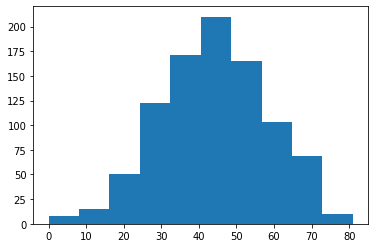

In [92]:
def get_ages_from_birth(row):
    month_dict = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
    year = 0
    month = 0
    i = row[0]
    if not pd.isna(i):
        i = i.split("-")
        year = i[0]
        month = i[1]
    else:
        return pd.NA
    if int(month) >= month_dict[row[month_of_birth[0]]]:
        return int(year) - int(row[year_of_birth[0]])
    return int(year) - int(row[year_of_birth[0]]) - 1
df_oto_500k["oto_age"] = df_oto_500k[date_oto+year_of_birth+month_of_birth].apply(get_ages_from_birth, axis=1)
df_oto_500k["oto_age"].hist(grid=False)

/tmp/2592277.1.high_mem.q/ipykernel_11860/315914692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oto_200k["oto_age"] = df_oto_200k[date_oto+year_of_birth+month_of_birth].apply(get_ages_from_birth, axis=1)


<AxesSubplot:>

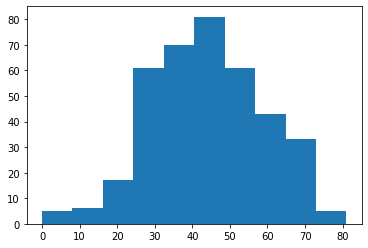

In [93]:
df_oto_200k["oto_age"] = df_oto_200k[date_oto+year_of_birth+month_of_birth].apply(get_ages_from_birth, axis=1)
df_oto_200k["oto_age"].hist(grid=False)

## Define the sex

In [94]:
df_oto_500k["f.31.0.0"].value_counts(dropna=False)

Female    598
Male      325
Name: f.31.0.0, dtype: Int64

In [95]:
# male is denoted a 0, female as 1
def find_sex(row):
    if row["f.31.0.0"] == "Male":
        return 0
    return 1

df_oto_500k["sex"] = df_oto_500k[["f.31.0.0"]].apply(find_sex, axis=1)
df_oto_500k["sex"].value_counts(dropna=False)

/tmp/2592277.1.high_mem.q/ipykernel_11860/1081199210.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oto_500k["sex"] = df_oto_500k[["f.31.0.0"]].apply(find_sex, axis=1)


1    598
0    325
Name: sex, dtype: int64

In [96]:
df_oto_500k.to_csv("~/UKBiobank/phenotype_files/HI_UKBB/otosclerosis/063022_oto_500k_case.matrix.csv",index=False)

In [97]:
df_oto_200k["sex"] = df_oto_200k[["f.31.0.0"]].apply(find_sex, axis=1)
df_oto_200k["sex"].value_counts(dropna=False)

/tmp/2592277.1.high_mem.q/ipykernel_11860/103918465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oto_200k["sex"] = df_oto_200k[["f.31.0.0"]].apply(find_sex, axis=1)


1    248
0    134
Name: sex, dtype: int64

In [98]:
df_oto_200k.to_csv("~/UKBiobank/phenotype_files/HI_UKBB/otosclerosis/063022_oto_200k_case.matrix.csv",index=False)

# Identify Pure Controls for Otosclerosis

In [99]:
import pandas as pd
import numpy as np
# Added the age at recruitment, hearing impairment trait
with open("/mnt/vast/hpc/csg/UKBiobank/phenotype_files/HI_UKBB/092821_UKBB_486416ind_call90.csv") as fp:
    line = fp.readline() # header
    header = line.split(",")
    
    indiv = ["IID", "FID"]
    icd10_colnames = [col.strip('"') for col in header if "f.41270." in col]
    icd10_ages = [col.strip('"') for col in header if "f.41280." in col]
    icd9_colnames = [col.strip('"') for col in header if "f.41271." in col]
    icd9_ages = [col.strip('"') for col in header if "f.41281." in col]
    f20002_colnames = [col.strip('"') for col in header if "f.20002." in col]
    reported_sex = ["f.31.0.0"]
    genetic_sex = ["f.22001.0.0"]
    ethnicity = [col.strip('"') for col in header if "f.21000." in col]
    source_oto = [col.strip('"') for col in header if "f.131251" in col]
    date_oto = [col.strip('"') for col in header if "f.131250" in col]
    source_vestibular = [col.strip('"') for col in header if "f.131253" in col] 
    date_vestibular = [col.strip('"') for col in header if "f.131252" in col]
    age_rec = [col.strip('"') for col in header if "f.21022" in col]
    year_of_birth = [col.strip('"') for col in header if "f.34." in col]
    month_of_birth = [col.strip('"') for col in header if "f.52." in col]
    hearing_imp_f3393 = [col.strip('"') for col in header if "f.3393." in col]
    hearing_imp_f2247 = [col.strip('"') for col in header if "f.2247." in col]
    hearing_imp_f2257 = [col.strip('"') for col in header if "f.2257." in col]
# combine the column names into one list
combined_cols = indiv + icd10_colnames + icd10_ages + icd9_colnames + icd9_ages + \
                f20002_colnames + ethnicity + reported_sex + genetic_sex + source_oto \
                + date_oto + source_vestibular + date_vestibular + year_of_birth + \
                month_of_birth + age_rec + hearing_imp_f3393 + hearing_imp_f2247 + \
                hearing_imp_f2257
df = pd.read_csv("/mnt/vast/hpc/csg/UKBiobank/phenotype_files/HI_UKBB/092821_UKBB_486416ind_call90.csv", quotechar = '"', dtype="string", usecols=combined_cols)
df

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.2247.0.0,f.2247.1.0,f.2247.2.0,f.2247.3.0,f.2257.0.0,...,f.41281.0.41,f.41281.0.42,f.41281.0.43,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0
0,1000019,1000019,Female,1960,November,Yes,<NA>,<NA>,<NA>,Yes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1000022,1000022,Male,1954,August,Yes,<NA>,<NA>,<NA>,Yes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1000035,1000035,Male,1944,May,No,<NA>,<NA>,<NA>,Yes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1000046,1000046,Female,1946,March,No,<NA>,No,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1000054,1000054,Female,1942,January,No,<NA>,<NA>,<NA>,Yes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486411,6025390,6025390,Female,1942,March,No,<NA>,<NA>,<NA>,Yes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486412,6025409,6025409,Female,1946,November,No,No,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486413,6025411,6025411,Female,1960,November,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
486414,6025425,6025425,Female,1963,August,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [100]:
# qc and filtering
exclusion = pd.read_csv("/mnt/vast/hpc/csg/UKBiobank/phenotype_files/HI_UKBB/otosclerosis/062922_ICD10_9_selfreport_inclusion_exclusion_otosclerosis_IS.csv")
qc_individuals = pd.read_csv("/mnt/vast/hpc/csg/UKBiobank/results/092821_PCA_results_500K/white_europeans/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.white_europeans.filtered.fam", sep="\t", header=None)
outlier = pd.read_csv("/mnt/vast/hpc/csg/UKBiobank/results/092821_PCA_results_500K/092821_PCA_related_pval0.005/ukb47922_white_460649ind.092821_PCA_related_pval0.005.pca.projected.outliers", sep="\t", header=None)
individs_200k = pd.read_csv("~/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c1.merged.filtered.fam", header=None, sep=" ")
individs_200k = df_filtered[df_filtered["FID"].isin(set([str(j) for j in individs_200k[0].to_list()]))]["FID"].tolist()## sex inconsistency
def inconsistent_sexes(row):
    return pd.isna(row[genetic_sex[0]]) or row[reported_sex[0]] != row[genetic_sex[0]]
ex_sex = df[reported_sex + genetic_sex].apply(inconsistent_sexes, axis=1)
df_filtered = df[~ex_sex]
## Non-white
white = ['British', 'Irish', 'White','Any other white background']
african = ['Caribbean','White and Black Caribbean', 'African', 'White and Black African', 'Black or Black British', 'Any other Black background' ]
asian = ['Indian', 'Pakistani', 'White and Asian', 'Any other Asian background', 'Bangladeshi', 'Asian or Asian British']
mixed = ['Mixed', 'Any other mixed background']
chinese = ['Chinese']
other = ['Other ethnic group']
def ancestry(row):
    temp = [x for x in row[ethnicity] if not pd.isna(x) and x != "Prefer not to answer" and x != "Do not know"]
    if len(temp) == 0:
        return "Unknown"
    
    if len(set(temp)) == 1 and temp[0] in white: # if we have only one unique answer and the answer is in the white variable
        return "_".join(temp[0].split(" ")) # return the unique answer
    
    if len([x for x in temp if x in white]) == len(temp):
        return "Inconsistent_white"
    if len([x for x in temp if x in african]) == len(temp):
        return "African"
    if len([x for x in temp if x in asian]) == len(temp):
        return "Asian"
    if len([x for x in temp if x in mixed]) == len(temp):
        return "Mixed"
    if len([x for x in temp if x in chinese]) == len(temp):
        return "Chinese"
    if len([x for x in temp if x in other]) == len(temp):
        return "Other"
    return "Inconsistent"
df_filtered["ethnicity"] = df_filtered[ethnicity].apply(ancestry, axis=1)
def find_non_white(row):
    return row["ethnicity"] not in white and row["ethnicity"] != "Unknown" and row["ethnicity"] != "Inconsistent_white" and row["ethnicity"] != "Any_other_white_background"
ex_non_white = df_filtered[["ethnicity"]].apply(find_non_white, axis=1)
df_filtered = df_filtered[~ex_non_white]
## qc
qc_list = set([str(i) for i in qc_individuals[0].to_list()])
def matches_qc_individuals(row):
    return row["FID"] in qc_list
df_filtered = df_filtered[df_filtered[["FID"]].apply(matches_qc_individuals, axis=1)]
## PCA outlier
out_ids = [str(x) for x in outlier[0].to_list()] 
def find_outliers(row):
    return row["IID"] in out_ids
ex_pca_outliers = df_filtered[["IID", "FID"]].apply(find_outliers, axis=1)
df_filtered = df_filtered[~ex_pca_outliers]
df_filtered.shape

(459267, 709)

In [101]:
# case union
f131251_id = df.dropna(subset=['f.131251.0.0'])['IID']

icd10 = df[icd10_colnames]
incl_oto = [ 'H80', 'H800', 'H801', "H802", "H808", "H809"]
def contains_code(row, incl_oto):
    for i in row:
        if not pd.isna(i) and i in incl_oto:
            return True   
    return False
incl_fxn_icd10 = lambda row: contains_code(row, incl_oto)
incl_10 = icd10.apply(incl_fxn_icd10, axis=1)
icd10_id = df[incl_10]['IID']

icd9 = df[icd9_colnames]
incl_oto_9 = ['387','3870', '3871', '3872', '3878', '3879']
def contains_code(row, incl_oto_9):
    for i in row:
        if not pd.isna(i) and i in incl_oto_9:
            return True         
    return False
incl_fxn_icd9 = lambda row: contains_code(row, incl_oto_9)
incl_9 = icd9.apply(incl_fxn_icd9, axis=1)
icd9_id = df[incl_9]['IID']

f20002 = df[f20002_colnames]
incl_oto_self = ['1420']
def contains_code(row, incl_oto_self):
    for i in row:
        if not pd.isna(i) and i in incl_oto_self:
            return True           
    return False
incl_fxn_f20002 = lambda row: contains_code(row, incl_oto_self)
incl_f20002 = f20002.apply(incl_fxn_f20002, axis=1)
f20002_id = df[incl_f20002]['IID']

df_union= pd.concat([f131251_id, icd10_id, icd9_id, f20002_id]).drop_duplicates()
df_union.shape

(1095,)

## Exclusion for the full database

In [102]:
def contains_exclusion(row, exclusion_list):
    for i in row:
        if not pd.isna(i) and i in exclusion_list:
            return True  
    return False
icd10 = df_filtered[icd10_colnames]
ex_critia_icd10 = exclusion[(exclusion["Excluded_fulldb_lateonsetHI"]=="Y")&(exclusion["UKBB_field_code"]=="f.41270")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()
ex_fxn_icd10 = lambda row: contains_exclusion(row, ex_critia_icd10)
ex_10 = icd10.apply(ex_fxn_icd10, axis=1)
df_filtered = df_filtered[~ex_10]
print(sum(ex_10), "individuals removed because of icd10 codes")

icd9 = df_filtered[icd9_colnames]
ex_critia_icd9 = exclusion[(exclusion["Excluded_fulldb_lateonsetHI"]=="Y")&(exclusion["UKBB_field_code"]=="f.41271")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()
ex_fxn_icd9 = lambda row: contains_exclusion(row, ex_critia_icd9)
ex_9 = icd9.apply(ex_fxn_icd9, axis=1)
df_filtered = df_filtered[~ex_9]
print(sum(ex_9), "individuals removed because of icd9 codes")

f20002 = df_filtered[f20002_colnames]
ex_critia_f20002 = exclusion[(exclusion["Excluded_fulldb_lateonsetHI"]=="Y")&(exclusion["UKBB_field_code"]=="f.20002")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()
ex_fxn_f20002 = lambda row: contains_exclusion(row, ex_critia_f20002)
ex_f20002 = f20002.apply(ex_fxn_f20002, axis=1)
df_filtered = df_filtered[~ex_f20002]
print(sum(ex_f20002), "individuals removed because of self-reported codes")

/tmp/2592277.1.high_mem.q/ipykernel_11860/3788725110.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ex_critia_icd10 = exclusion[(exclusion["Excluded_fulldb_lateonsetHI"]=="Y")&(exclusion["UKBB_field_code"]=="f.41270")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()


11979 individuals removed because of icd10 codes


/tmp/2592277.1.high_mem.q/ipykernel_11860/3788725110.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ex_critia_icd9 = exclusion[(exclusion["Excluded_fulldb_lateonsetHI"]=="Y")&(exclusion["UKBB_field_code"]=="f.41271")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()


685 individuals removed because of icd9 codes


/tmp/2592277.1.high_mem.q/ipykernel_11860/3788725110.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ex_critia_f20002 = exclusion[(exclusion["Excluded_fulldb_lateonsetHI"]=="Y")&(exclusion["UKBB_field_code"]=="f.20002")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()


5437 individuals removed because of self-reported codes


In [107]:
df_save = df_filtered.copy()

## Exclusion only for the controls

In [103]:
exclusion[exclusion["Excluded_from_controls"]=="Y"]

,UKBB_field_code,Phenotype,cases_UKB_showcase,Excluded_fulldb_lateonsetHI,Excluded_from_controls,Otosclerosis,Meniere's,Cases_f3393,Cases_f2247,Cases_f2257,Cases_f4803,Unnamed: 11,Unnamed: 12,Unnamed: 13
69,f.41270,H74.2 Discontinuity and dislocation of ear oss...,41,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,f.41270,H74.3 Other acquired abnormalities of ear ossi...,129,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,f.41270,H74.8 Other specified disorders of middle ear ...,165,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,f.41270,"H74.9 Disorder of middle ear and mastoid, unsp...",63,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,f.41270,H80 Otosclerosis,NaN,N,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,f.41271,V532 Fitting and adjustment of hearing aid,0,N,Y,NaN,NaN,Y,N,N,NaN,NaN,NaN,NaN
472,f.41271,75658 Osteodystrophies (other),NaN,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,f.41271,75659 Osteodystrophies (unspecified),NaN,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564,f.20002,1415 ear/vestibular disorder,NaN,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
exclusion[exclusion["Excluded_from_controls"]=="Y"]["UKBB_field_code"].value_counts()

f.41270    36
f.41271    25
f.20002     2
Name: UKBB_field_code, dtype: int64

In [105]:
exclusion[exclusion["Excluded_from_controls"]=="Y (if they reply yes to any instance)"]

,UKBB_field_code,Phenotype,cases_UKB_showcase,Excluded_fulldb_lateonsetHI,Excluded_from_controls,Otosclerosis,Meniere's,Cases_f3393,Cases_f2247,Cases_f2257,Cases_f4803,Unnamed: 11,Unnamed: 12,Unnamed: 13
299,f.3393,"Hearing aid user - ""Do you use a hearing aid m...",332151,N,Y (if they reply yes to any instance),NaN,NaN,Y,N (cases only if they reply yes to f2247),N (case only if reply yes to f2257),NaN,NaN,NaN,NaN
304,f.2247,"Hearing difficulty/problems - ""Do you have any...",498679,N,Y (if they reply yes to any instance),NaN,NaN,N,Y,N,NaN,NaN,NaN,NaN


In [106]:
exclusion[exclusion["Excluded_from_controls"]=="Y (if they reply yes to any instance, check for consistency remove from controls the ones that are consistent for do not know )"]

,UKBB_field_code,Phenotype,cases_UKB_showcase,Excluded_fulldb_lateonsetHI,Excluded_from_controls,Otosclerosis,Meniere's,Cases_f3393,Cases_f2247,Cases_f2257,Cases_f4803,Unnamed: 11,Unnamed: 12,Unnamed: 13
309,f.2257,Hearing difficulty/problems with background no...,501432,N,"Y (if they reply yes to any instance, check fo...",NaN,NaN,N,N,Y,NaN,NaN,NaN,NaN


### ICD10 exclusion

In [110]:
df_filtered = df_filtered[~df_filtered['IID'].isin(df_union)]

In [121]:
ex_critia_icd10 = exclusion[(exclusion["Excluded_from_controls"]=="Y")&(exclusion["UKBB_field_code"]=="f.41270")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()
ex_critia_icd10[:5]

/tmp/2592277.1.high_mem.q/ipykernel_11860/2304357098.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ex_critia_icd10 = exclusion[(exclusion["Excluded_from_controls"]=="Y")&(exclusion["UKBB_field_code"]=="f.41270")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()


['H742', 'H743', 'H748', 'H749', 'H80']

In [122]:
icd10 = df_filtered[icd10_colnames]
ex_fxn_icd10 = lambda row: contains_exclusion(row, ex_critia_icd10)
ex_10 = icd10.apply(ex_fxn_icd10, axis=1)
df_filtered = df_filtered[~ex_10]
print(sum(ex_10), "individuals removed because of icd10 codes")

9714 individuals removed because of icd10 codes


In [123]:
df_filtered.shape

(430504, 709)

### ICD9 exclusion

In [124]:
ex_critia_icd9 = exclusion[(exclusion["Excluded_from_controls"]=="Y")&(exclusion["UKBB_field_code"]=="f.41271")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()
ex_critia_icd9[:5]

/tmp/2592277.1.high_mem.q/ipykernel_11860/3554329692.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ex_critia_icd9 = exclusion[(exclusion["Excluded_from_controls"]=="Y")&(exclusion["UKBB_field_code"]=="f.41271")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()


['3852', '3858', '3859', '387', '3870']

In [125]:
icd9 = df_filtered[icd9_colnames]
ex_fxn_icd9 = lambda row: contains_exclusion(row, ex_critia_icd9)
ex_9 = icd9.apply(ex_fxn_icd9, axis=1)
df_filtered = df_filtered[~ex_9]
print(sum(ex_9), "individuals removed because of icd9 codes")

81 individuals removed because of icd9 codes


In [126]:
df_filtered.shape

(430423, 709)

### self-report exclusion

In [127]:
ex_critia_f20002 = exclusion[(exclusion["Excluded_from_controls"]=="Y")&(exclusion["UKBB_field_code"]=="f.20002")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()
ex_critia_f20002[:5]

/tmp/2592277.1.high_mem.q/ipykernel_11860/2622245621.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ex_critia_f20002 = exclusion[(exclusion["Excluded_from_controls"]=="Y")&(exclusion["UKBB_field_code"]=="f.20002")]["Phenotype"].str.split(" ",expand=True)[0].str.replace(".","").astype("string").to_list()


['1415', '1420']

In [128]:
f20002 = df_filtered[f20002_colnames]
ex_fxn_f20002 = lambda row: contains_exclusion(row, ex_critia_f20002)
ex_f20002 = f20002.apply(ex_fxn_f20002, axis=1)
df_filtered = df_filtered[~ex_f20002]
print(sum(ex_f20002), "individuals removed because of self-reported codes")

3068 individuals removed because of self-reported codes


In [129]:
df_filtered.shape

(427355, 709)

### Hearing impairment exclusion

In [130]:
## remove those who are completely deaf 
def find_deaf(row):
    for i in row:
        if not pd.isna(i) and i == "I am completely deaf":
            return True
    return False
deaf = df_filtered[hearing_imp_f3393+hearing_imp_f2247+hearing_imp_f2257].apply(find_deaf, axis=1)
df_filtered = df_filtered[~deaf]
print(sum(deaf), "individuals removed because of completely deafness")

32 individuals removed because of completely deafness


In [131]:
hearing_ans = {"Do not know":9, "Yes":1, "No":0}
# returns True if it's a ctrl or else False
def find_ctrl(row):
    answer = "".join([str(hearing_ans[i]) for i in row if not pd.isna(i) and i != "Prefer not to answer"])
    if "0" in answer and "1" not in answer:
        return True
    return False

# returns True if it's a ctrl or else False
# this is specific for f3393 because f3393 was only asked under certain circumstances
def find_ctrl_or_NA(row):
    for i in row:
        if not pd.isna(i) and i != "No" and i != "Prefer not to answer": # if we have any answers that are not NA or No only then we don't have a ctrl
            return False
    return True
# filter through the hearing impairment questions to find the controls
f3393_ctrl = df_filtered[hearing_imp_f3393].apply(find_ctrl_or_NA, axis=1).to_list()
f2247_ctrl = df_filtered[hearing_imp_f2247].apply(find_ctrl, axis=1).to_list()
f2257_ctrl = df_filtered[hearing_imp_f2257].apply(find_ctrl, axis=1).to_list()
pure_ctrl = [True if i == True and f2247_ctrl[en] == True and f2257_ctrl[en] == True else False for en, i in enumerate(f3393_ctrl)]
len(pure_ctrl)

427323

In [134]:
df_filtered = df_filtered[pure_ctrl]
print(len(pure_ctrl)-sum(pure_ctrl), "individuals removed because of impure control")

188688 individuals removed because of impure control


## Define the age

In [135]:
df_filtered[age_rec]

,f.21022.0.0
5,43
6,52
7,67
11,62
12,46
...,...
486408,64
486412,61
486413,49
486414,44


<AxesSubplot:>

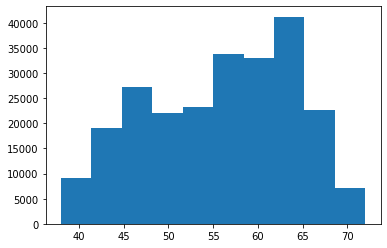

In [136]:
df_filtered["oto_age"] = df_filtered[age_rec]
df_filtered["oto_age"].astype("int").hist(grid=False)

## Define the sex

In [137]:
# male is denoted a 0, female as 1
def find_sex(row):
    if row["f.31.0.0"] == "Male":
        return 0
    return 1
df_filtered["sex"] = df_filtered[["f.31.0.0"]].apply(find_sex, axis=1)
df_filtered["sex"].value_counts(dropna=False)

1    142588
0     96047
Name: sex, dtype: int64

In [138]:
df_filtered.to_csv("~/UKBiobank/phenotype_files/HI_UKBB/otosclerosis/070122_oto_500k_control.matrix.csv",index=False)
df_filtered[df_filtered["IID"].isin(individs_200k)].to_csv("~/UKBiobank/phenotype_files/HI_UKBB/otosclerosis/070122_oto_200k_control.matrix.csv",index=False)

# Output phenotype files

In [139]:
import pandas as pd
case_500k = pd.read_csv("~/UKBiobank/phenotype_files/HI_UKBB/otosclerosis/063022_oto_500k_case.matrix.csv")
case_500k[["IID","FID","oto","oto_age","sex"]]

,IID,FID,oto,oto_age,sex
0,1000947,1000947,1,65,1
1,1005657,1005657,1,50,1
2,1010464,1010464,1,50,1
3,1013752,1013752,1,16,0
4,1015569,1015569,1,30,1
...,...,...,...,...,...
918,5995762,5995762,1,50,1
919,5996216,5996216,1,53,0
920,6002333,6002333,1,35,0
921,6009310,6009310,1,51,1


In [140]:
ctr_500k = pd.read_csv("~/UKBiobank/phenotype_files/HI_UKBB/otosclerosis/070122_oto_500k_control.matrix.csv")
ctr_500k[["IID","FID","oto_age","sex"]]

/tmp/2592277.1.high_mem.q/ipykernel_11860/1458094002.py:1: DtypeWarning: Columns (8,12,16,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,425,426,427,428,429,430,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,50

,IID,FID,oto_age,sex
0,1000063,1000063,43,0
1,1000078,1000078,52,1
2,1000081,1000081,67,0
3,1000129,1000129,62,0
4,1000137,1000137,46,1
...,...,...,...,...
238630,6025363,6025363,64,0
238631,6025409,6025409,61,1
238632,6025411,6025411,49,1
238633,6025425,6025425,44,1


In [141]:
ctr_500k = ctr_500k[["IID","FID","oto_age","sex"]]
ctr_500k["oto"] = 0
ctr_500k = ctr_500k[["IID","FID","oto","oto_age","sex"]]
ctr_500k

,IID,FID,oto,oto_age,sex
0,1000063,1000063,0,43,0
1,1000078,1000078,0,52,1
2,1000081,1000081,0,67,0
3,1000129,1000129,0,62,0
4,1000137,1000137,0,46,1
...,...,...,...,...,...
238630,6025363,6025363,0,64,0
238631,6025409,6025409,0,61,1
238632,6025411,6025411,0,49,1
238633,6025425,6025425,0,44,1


In [142]:
phe = pd.concat([case_500k[["IID","FID","oto","oto_age","sex"]],ctr_500k],axis=0)
phe

,IID,FID,oto,oto_age,sex
0,1000947,1000947,1,65,1
1,1005657,1005657,1,50,1
2,1010464,1010464,1,50,1
3,1013752,1013752,1,16,0
4,1015569,1015569,1,30,1
...,...,...,...,...,...
238630,6025363,6025363,0,64,0
238631,6025409,6025409,0,61,1
238632,6025411,6025411,0,49,1
238633,6025425,6025425,0,44,1


<AxesSubplot:title={'center':'oto_age'}, xlabel='oto'>

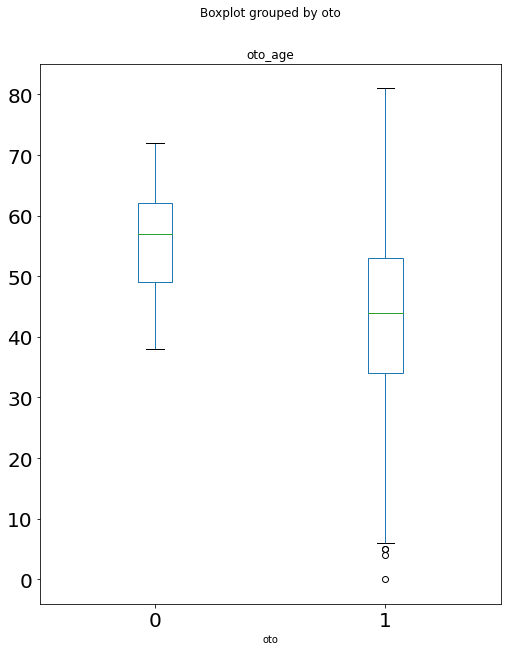

In [143]:
phe.boxplot(column="oto_age",by="oto",grid=False,figsize=(8,10),fontsize=20)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

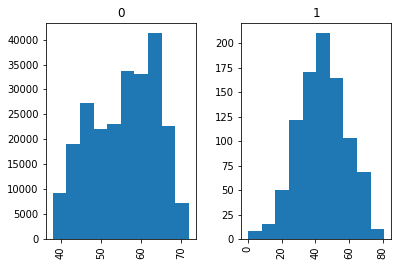

In [144]:
phe.hist(column="oto_age",by="oto",grid=False)

In [145]:
phe[["oto","sex"]].value_counts()

oto  sex
0    1      142588
     0       96047
1    1         598
     0         325
dtype: int64

In [146]:
phe["oto"].value_counts()

0    238635
1       923
Name: oto, dtype: int64

In [147]:
phe = phe.rename(columns={"oto_age": "age"})
phe.to_csv("~/UKBiobank/phenotype_files/HI_UKBB/otosclerosis/070122_oto_500k.923case_238635ctrl.tsv",index=False,sep="\t")

In [148]:
case_200k = pd.read_csv("~/UKBiobank/phenotype_files/HI_UKBB/otosclerosis/063022_oto_200k_case.matrix.csv")
case_200k[["IID","FID","oto","oto_age","sex"]]

,IID,FID,oto,oto_age,sex
0,1010464,1010464,1,50,1
1,1013752,1013752,1,16,0
2,1015569,1015569,1,30,1
3,1029344,1029344,1,25,1
4,1057951,1057951,1,51,0
...,...,...,...,...,...
377,5926575,5926575,1,32,1
378,5940765,5940765,1,50,1
379,5966131,5966131,1,44,0
380,5988084,5988084,1,33,0


In [149]:
ctr_200k = pd.read_csv("~/UKBiobank/phenotype_files/HI_UKBB/otosclerosis/070122_oto_200k_control.matrix.csv")
ctr_200k[["IID","FID","oto_age","sex"]]

/tmp/2592277.1.high_mem.q/ipykernel_11860/2554081343.py:1: DtypeWarning: Columns (228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,55

,IID,FID,oto_age,sex
0,1000078,1000078,52,1
1,1000081,1000081,67,0
2,1000224,1000224,58,1
3,1000236,1000236,61,0
4,1000255,1000255,51,1
...,...,...,...,...
97045,6025251,6025251,56,0
97046,6025319,6025319,56,1
97047,6025346,6025346,53,1
97048,6025363,6025363,64,0


In [150]:
ctr_200k = ctr_200k[["IID","FID","oto_age","sex"]]
ctr_200k["oto"] = 0
ctr_200k = ctr_200k[["IID","FID","oto","oto_age","sex"]]
phe = pd.concat([case_200k[["IID","FID","oto","oto_age","sex"]],ctr_200k],axis=0)
phe

,IID,FID,oto,oto_age,sex
0,1010464,1010464,1,50,1
1,1013752,1013752,1,16,0
2,1015569,1015569,1,30,1
3,1029344,1029344,1,25,1
4,1057951,1057951,1,51,0
...,...,...,...,...,...
97045,6025251,6025251,0,56,0
97046,6025319,6025319,0,56,1
97047,6025346,6025346,0,53,1
97048,6025363,6025363,0,64,0


<AxesSubplot:title={'center':'oto_age'}, xlabel='oto'>

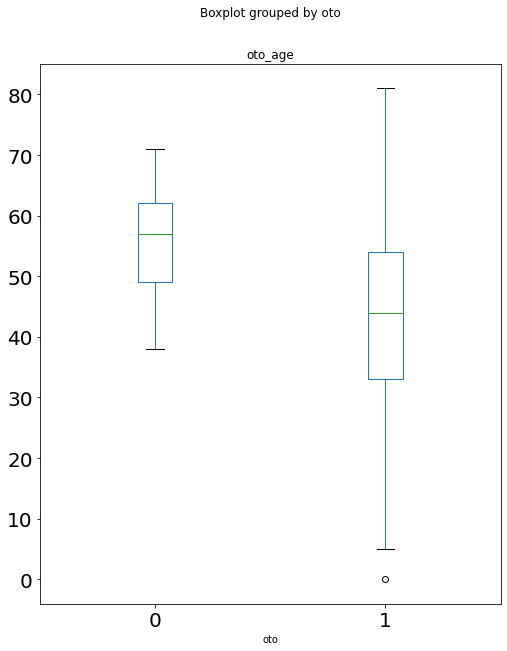

In [151]:
phe.boxplot(column="oto_age",by="oto",grid=False,figsize=(8,10),fontsize=20)

In [152]:
phe[["oto","sex"]].value_counts()

oto  sex
0    1      58778
     0      38272
1    1        248
     0        134
dtype: int64

In [153]:
phe["oto"].value_counts()

0    97050
1      382
Name: oto, dtype: int64

In [154]:
phe = phe.rename(columns={"oto_age": "age"})
phe.to_csv("~/UKBiobank/phenotype_files/HI_UKBB/otosclerosis/070122_oto_200k.382case_97050ctrl.tsv",index=False,sep="\t")